In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
import tensorflow as tf
import torch
warnings.filterwarnings('ignore')
%matplotlib inline

df = pd.read_csv('./new_temp_file/temperature_time')
df.drop(columns='Unnamed: 0', inplace=True)

def trend(time, slope = 0):
    return time * slope

for i in range(1,8):
    globals()['df_'+str(i)+'_temp'] = df[73462*(i-1):73462*i].reset_index().drop(columns=['index'], axis=0)

for i in range(1,8):
    mean = globals()['df_'+str(i)+'_temp']['TEMP'].mean()
    diff  = 283.733148 - mean
    globals()['df_'+str(i)+'_temp']['TEMP'] += diff

for i in range(8,12):
    globals()['df_'+str(i)+'_temp'] = globals()['df_'+str(i-5)+'_temp'].copy()

N = 6
dx = (600 - df_1_temp['TEMP'].mean()) / N # 전체 데이터에 대한 증가율 : 56.3785
dx_minute = dx / (len(df_1_temp)-1) # 분당 증가율

time = np.arange(73462)
slope = dx_minute * 2

for i in range(2,12):
    series = np.round(trend(time, slope = slope) + globals()['df_'+str(i)+'_temp']['TEMP'] + dx*(i-2), 3)
    globals()['df_'+str(i)+'_temp']['TEMP'] = series

df_temp_all = pd.concat([df_1_temp, df_2_temp], axis = 0)
df_temp_all = pd.concat([df_temp_all, df_3_temp], axis = 0)
df_temp_all = pd.concat([df_temp_all, df_4_temp], axis = 0)
df_temp_all = pd.concat([df_temp_all, df_5_temp], axis = 0)
df_temp_all = pd.concat([df_temp_all, df_6_temp], axis = 0)
df_temp_all = pd.concat([df_temp_all, df_7_temp], axis = 0)
df_temp_all = pd.concat([df_temp_all, df_8_temp], axis = 0)
df_temp_all = pd.concat([df_temp_all, df_9_temp], axis = 0)
df_temp_all = pd.concat([df_temp_all, df_10_temp], axis = 0)
df_temp_all = pd.concat([df_temp_all, df_11_temp], axis = 0)
df_temp_all = df_temp_all.reset_index().drop(columns=['index','TIME'])
tmp = np.arange(808082)
TIME = pd.DataFrame({'TIME' : tmp})
df_temp_all = pd.concat([df_temp_all, TIME], axis = 1)

for i in range(1,12):
    data = {'MEAN_TEMP' : [], 'STD' : [], 'MIN' : [], 'MAX' : [], 'SKEW' : [], 'KURT' : [], 'MEDIAN':[], '25%' : [], '75%' : [], 'Group' : []}

    for j in range(0,73462,10):
        temp = globals()['df_'+str(i)+'_temp']['TEMP'][j:j+20]
        MEAN = np.round(np.mean(temp), 3)
        MIN = np.min(temp)
        MAX = np.max(temp)
        STD = np.std(temp)
        median = temp.median()
        skew = temp.skew()
        kurt = temp.kurt()
        a, b = np.percentile(temp, q = [25,75])

        data['Group'].append(i)
        data['MEAN_TEMP'].append(MEAN)
        data['MIN'].append(MIN)
        data['MAX'].append(MAX)
        data['STD'].append(STD)
        data['SKEW'].append(skew)
        data['KURT'].append(kurt)
        data['MEDIAN'].append(np.round(median,3))
        data['25%'].append(np.round(a,3))
        data['75%'].append(np.round(b,3))

    globals()['group_'+str(i)] = pd.DataFrame(data)


print(len(group_1))
TIME = pd.DataFrame({'TIME' : np.arange(80817)})
tmp = pd.concat([group_1, group_2], axis = 0)
tmp = pd.concat([tmp, group_3], axis = 0)
tmp = pd.concat([tmp, group_4], axis = 0)
tmp = pd.concat([tmp, group_5], axis = 0)
tmp = pd.concat([tmp, group_6], axis = 0)
tmp = pd.concat([tmp, group_7], axis = 0)
tmp = pd.concat([tmp, group_8], axis = 0)
tmp = pd.concat([tmp, group_9], axis = 0)
tmp = pd.concat([tmp, group_10], axis = 0)
tmp = pd.concat([tmp, group_11], axis = 0)
tmp = tmp.reset_index()
tmp = pd.concat([tmp, TIME], axis = 1)
tmp.drop(columns = ['index'], inplace = True)
df_9_cols = tmp
df_9_cols = df_9_cols.dropna(axis = 0).reset_index().drop(columns=['index'])
df_9_cols


7347


,MEAN_TEMP,STD,MIN,MAX,SKEW,KURT,MEDIAN,25%,75%,Group,TIME
0,285.886,0.703473,284.483,287.082,-0.295420,-0.875405,285.893,285.274,286.394,1,0
1,284.200,1.858006,281.401,286.690,-0.067890,-1.659449,284.126,282.486,285.963,1,1
2,282.799,0.721184,281.401,284.014,-0.285944,-0.801952,282.885,282.242,283.295,1,2
3,283.295,0.440360,282.306,284.014,-0.567776,-0.220987,283.327,283.082,283.642,1,3
4,283.836,0.709563,283.085,285.439,1.343684,0.750411,283.647,283.312,283.884,1,4
...,...,...,...,...,...,...,...,...,...,...,...
80801,859.483,0.195625,859.055,859.769,-0.407907,-0.315194,859.477,859.378,859.658,11,80811
80802,859.064,0.434339,858.337,859.755,-0.409836,-1.079603,859.194,858.643,859.396,11,80812
80803,858.936,0.407331,858.337,859.522,-0.032319,-1.664372,858.917,858.602,859.322,11,80813
80804,859.058,0.262727,858.522,859.522,0.008027,-0.418698,858.999,858.941,859.286,11,80814


In [5]:
def THRESHOLD(data):
    if data>=784.4889:
        return 11
    elif data>=731.7778:
        return 10
    elif data>=679.0667:
        return 9
    elif data>=626.3555:
        return 8
    elif data>=573.6444:
        return 7
    elif data>=520.9332:
        return 6
    elif data>=468.2221:
        return 5
    elif data>=415.5110:
        return 4
    elif data>=362.7998:
        return 3
    elif data>=310.0887:
        return 2
    else:
        return 1

In [6]:
X = df_9_cols['MEAN_TEMP'].values
Y = df_9_cols['Group'].values

predict = list(map(THRESHOLD, X))
print(accuracy_score(predict, Y))

0.6012177313565824


In [17]:
import torch
device = 'cuda' if torch.cuda.is_available() else "cpu"
device

'cuda'

In [4]:
df_temp_all

,TEMP,TIME
0,286.797,0
1,287.082,1
2,285.938,2
3,285.772,3
4,286.357,4
...,...,...
808077,858.986,808077
808078,858.998,808078
808079,858.853,808079
808080,858.717,808080


In [321]:
from copy import deepcopy as dc
SEED = 42
np.random.seed(SEED)
torch.manual_seed(SEED)

def prepare_dataframe_for_lstm(df, n_steps):
    df = dc(df)
    
    for i in range(1,n_steps+1):
        df[f'TEMP(t-{i})'] = df['TEMP'].shift(i)

    df.dropna(inplace=True)
    return df

lookback = 10
shifted_df = prepare_dataframe_for_lstm(df_temp_all, lookback)
shifted_df

,TEMP,TIME,TEMP(t-1),TEMP(t-2),TEMP(t-3),TEMP(t-4),TEMP(t-5),TEMP(t-6),TEMP(t-7),TEMP(t-8),TEMP(t-9),TEMP(t-10)
10,285.599,10,285.140,284.926,285.025,285.319,286.277,286.357,285.772,285.938,287.082,286.797
11,285.847,11,285.599,285.140,284.926,285.025,285.319,286.277,286.357,285.772,285.938,287.082
12,286.690,12,285.847,285.599,285.140,284.926,285.025,285.319,286.277,286.357,285.772,285.938
13,286.455,13,286.690,285.847,285.599,285.140,284.926,285.025,285.319,286.277,286.357,285.772
14,286.533,14,286.455,286.690,285.847,285.599,285.140,284.926,285.025,285.319,286.277,286.357
...,...,...,...,...,...,...,...,...,...,...,...,...
808077,858.986,808077,858.907,858.964,859.000,858.990,859.053,859.051,859.141,859.316,859.522,859.457
808078,858.998,808078,858.986,858.907,858.964,859.000,858.990,859.053,859.051,859.141,859.316,859.522
808079,858.853,808079,858.998,858.986,858.907,858.964,859.000,858.990,859.053,859.051,859.141,859.316
808080,858.717,808080,858.853,858.998,858.986,858.907,858.964,859.000,858.990,859.053,859.051,859.141


In [322]:
shifted_df.drop(columns='TIME', inplace = True)
shifted_df

,TEMP,TEMP(t-1),TEMP(t-2),TEMP(t-3),TEMP(t-4),TEMP(t-5),TEMP(t-6),TEMP(t-7),TEMP(t-8),TEMP(t-9),TEMP(t-10)
10,285.599,285.140,284.926,285.025,285.319,286.277,286.357,285.772,285.938,287.082,286.797
11,285.847,285.599,285.140,284.926,285.025,285.319,286.277,286.357,285.772,285.938,287.082
12,286.690,285.847,285.599,285.140,284.926,285.025,285.319,286.277,286.357,285.772,285.938
13,286.455,286.690,285.847,285.599,285.140,284.926,285.025,285.319,286.277,286.357,285.772
14,286.533,286.455,286.690,285.847,285.599,285.140,284.926,285.025,285.319,286.277,286.357
...,...,...,...,...,...,...,...,...,...,...,...
808077,858.986,858.907,858.964,859.000,858.990,859.053,859.051,859.141,859.316,859.522,859.457
808078,858.998,858.986,858.907,858.964,859.000,858.990,859.053,859.051,859.141,859.316,859.522
808079,858.853,858.998,858.986,858.907,858.964,859.000,858.990,859.053,859.051,859.141,859.316
808080,858.717,858.853,858.998,858.986,858.907,858.964,859.000,858.990,859.053,859.051,859.141


In [323]:
X = shifted_df.values
X

array([[285.59900015, 285.14000015, 284.92600015, ..., 285.93800015,
        287.08200015, 286.79700015],
       [285.84700015, 285.59900015, 285.14000015, ..., 285.77200015,
        285.93800015, 287.08200015],
       [286.69000015, 285.84700015, 285.59900015, ..., 286.35700015,
        285.77200015, 285.93800015],
       ...,
       [858.853     , 858.998     , 858.986     , ..., 859.051     ,
        859.141     , 859.316     ],
       [858.717     , 858.853     , 858.998     , ..., 859.053     ,
        859.051     , 859.141     ],
       [858.818     , 858.717     , 858.853     , ..., 858.99      ,
        859.053     , 859.051     ]])

In [324]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[0.03244905, 0.03170187, 0.03135352, ..., 0.03300088, 0.03486311,
        0.03439918],
       [0.03285275, 0.03244905, 0.03170187, ..., 0.03273066, 0.03300088,
        0.03486311],
       [0.034225  , 0.03285275, 0.03244905, ..., 0.03368294, 0.03273066,
        0.03300088],
       ...,
       [0.96560571, 0.96584174, 0.96582221, ..., 0.96592801, 0.96607452,
        0.96635939],
       [0.96538432, 0.96560571, 0.96584174, ..., 0.96593127, 0.96592801,
        0.96607452],
       [0.96554873, 0.96538432, 0.96560571, ..., 0.96582872, 0.96593127,
        0.96592801]])

In [325]:
y = X[:, 0]
X = X[:, 1:]
X.shape, y.shape

((808072, 10), (808072,))

In [326]:
train_len = int(len(X) * 0.1)
train_len

80807

In [327]:
X_train = X[train_len:]
X_test = X[:train_len]
y_train = y[train_len:]
y_test = y[:train_len]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((727265, 10), (80807, 10), (727265,), (80807,))

In [328]:
X_train = X_train.reshape((-1, lookback, 1))
X_test = X_test.reshape((-1, lookback, 1))
y_train = y_train.reshape((-1,1))
y_test = y_test.reshape((-1,1))

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((727265, 10, 1), (80807, 10, 1), (727265, 1), (80807, 1))

In [329]:
X_train = torch.tensor(X_train).float()
X_test = torch.tensor(X_test).float()
y_train = torch.tensor(y_train).float()
y_test = torch.tensor(y_test).float()
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([727265, 10, 1]),
 torch.Size([80807, 10, 1]),
 torch.Size([727265, 1]),
 torch.Size([80807, 1]))

In [330]:
from torch.utils.data import Dataset

class TimeSeriesDataset(Dataset):
    def __init__(self, X,y):
        self.X = X
        self.y = y
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]
    
train_dataset = TimeSeriesDataset(X_train, y_train)
test_dataset = TimeSeriesDataset(X_test, y_test)

In [331]:
from torch.utils.data import DataLoader

batch_size = 512

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle = True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle = False)

In [332]:
for _ , batch in enumerate(train_loader):
    X_batch, y_batch = batch[0].to(device), batch[1].to(device)
    print(X_batch.shape, y_batch.shape)
    break

torch.Size([512, 10, 1]) torch.Size([512, 1])


In [333]:
import torch.nn as nn
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_stacked_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_stacked_layers = num_stacked_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_stacked_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out
    
model = LSTM(1,4,1)
model.to(device)
model

LSTM(
  (lstm): LSTM(1, 4, batch_first=True)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)

In [306]:
def train_one_epoch():
    model.train(True)
    print(f"Epoch : {epoch + 1}")
    training_loss = 0.0

    for batch_index, batch in enumerate(train_loader):
        X_batch, y_batch = batch[0].to(device), batch[1].to(device)

        output = model(X_batch)
        loss = criterion(output, y_batch)
        training_loss += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_index % 1000 == 999:
            #avg_loss_cross_batches = training_loss / 1000
            print("Batch {0}, Training Loss : {1}".format(batch_size+1, loss))
        
        training_loss = 0.0

In [307]:
def validate_one_epoch():
    model.train(False)
    validation_loss = 0.0

    for batch_index, batch in enumerate(test_loader):
        X_batch, y_batch = batch[0].to(device), batch[1].to(device)

        with torch.no_grad():
            output = model(X_batch)
            loss = criterion(output, y_batch)
            validation_loss += loss.item()

    avg_loss_across_batches = validation_loss / len(test_loader)

    print('Val loss : {0}'.format(avg_loss_across_batches))
    print("***********************************************")

In [308]:
from tqdm import tqdm
lr = 0.001
num_epochs = 50
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(params = model.parameters(), lr = lr)

for epoch in range(num_epochs):
    # for _ , batch in 
    train_one_epoch()
    validate_one_epoch()

Epoch : 1
Batch 513, Training Loss : 0.00016607268480584025
Val loss : 0.0017116358838945957
***********************************************
Epoch : 2
Batch 513, Training Loss : 6.915006088092923e-05
Val loss : 0.0007367948861497962
***********************************************
Epoch : 3
Batch 513, Training Loss : 2.2773112505092286e-05
Val loss : 0.0003074566415353395
***********************************************
Epoch : 4
Batch 513, Training Loss : 4.004153197456617e-06
Val loss : 5.368427599345914e-05
***********************************************
Epoch : 5
Batch 513, Training Loss : 1.7377712993038585e-06
Val loss : 2.3195374014788664e-05
***********************************************
Epoch : 6
Batch 513, Training Loss : 1.4329489204101264e-06
Val loss : 1.7756368600813298e-05
***********************************************
Epoch : 7
Batch 513, Training Loss : 8.26379391583032e-07
Val loss : 1.558541989249499e-05
***********************************************
Epoch : 8
Batch

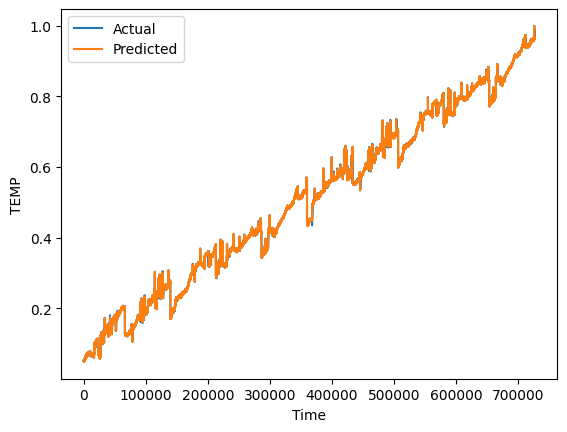

In [309]:
with torch.no_grad():
    predicted = model(X_train.to(device)).to('cpu').numpy()

plt.plot(y_train, label='Actual')
plt.plot(predicted, label='Predicted')
plt.xlabel('Time')
plt.ylabel('TEMP')
plt.legend()
plt.show()

In [310]:
with torch.no_grad():
    predicted = model(X_train.to(device)).to('cpu').numpy()

In [311]:
from sklearn.metrics import r2_score, accuracy_score
print("R2 : ", r2_score(predicted, y_train))
#print("accuracy : ", accuracy_score(predicted, y_train))

R2 :  0.9999835724127363


In [312]:
train_prediction = predicted.flatten()

dummies = np.zeros((X_train.shape[0], lookback+1))
dummies[:, 0] = train_prediction
dummies = scaler.inverse_transform(dummies)

train_predictions = dc(dummies[:, 0])
train_predictions

array([297.09099545, 297.06806001, 297.04576535, ..., 858.73145318,
       858.69718047, 858.63815524])

In [313]:
dummies = np.zeros((y_train.shape[0], lookback+1))
dummies[:, 0] = y_train.flatten(0)
dummies = scaler.inverse_transform(dummies)

new_y_train = dc(dummies[:, 0])
new_y_train

array([297.06600035, 297.05699964, 296.93899953, ..., 858.85298217,
       858.7169898 , 858.81801375])

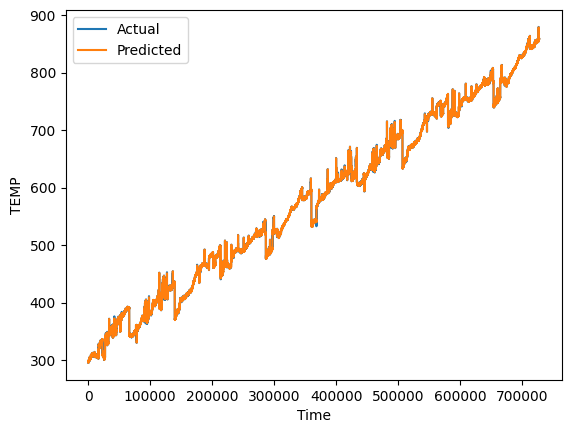

In [314]:
plt.plot(new_y_train, label='Actual')
plt.plot(train_predictions, label='Predicted')
plt.xlabel('Time')
plt.ylabel('TEMP')
plt.legend()
plt.show()

In [315]:
test_predictions = model(X_test.to(device)).detach().cpu().numpy().flatten()
dummies = np.zeros((X_test.shape[0], lookback+1))
dummies[:, 0] = test_predictions
dummies = scaler.inverse_transform(dummies)

test_predictions = dc(dummies[:, 0])
test_predictions

array([286.49054778, 286.3819626 , 286.03093734, ..., 297.13749795,
       297.13905872, 297.13027542])

In [316]:

dummies = np.zeros((X_test.shape[0], lookback+1))
dummies[:, 0] = y_test.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_test = dc(dummies[:, 0])
new_y_test

array([286.27700013, 285.31900044, 285.02500025, ..., 297.12800064,
       296.90100113, 296.96799952])

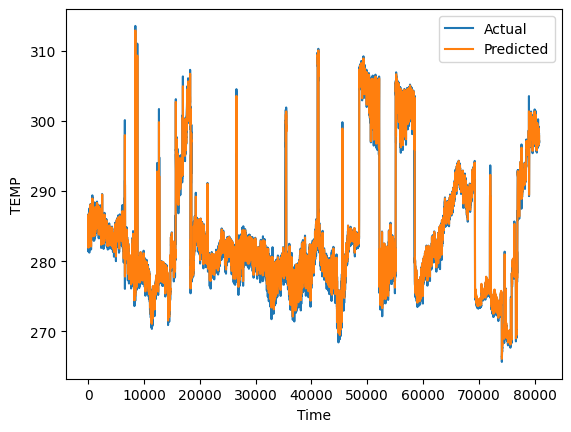

In [317]:
plt.plot(new_y_test, label='Actual')
plt.plot(test_predictions, label='Predicted')
plt.xlabel('Time')
plt.ylabel('TEMP')
plt.legend()
plt.show()

In [318]:
new_y_test.shape, test_predictions.shape

((80807,), (80807,))

In [319]:
print(r2_score(new_y_test, test_predictions))

0.9907768456999883


In [320]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(mean_absolute_error(new_y_test, test_predictions))
print(mean_squared_error(new_y_test, test_predictions))


0.5595803889552532
0.7203639359219224


## Transformer - 1

| epoch   1 |    62/  310 batches | lr 0.005000 |  8.15 ms | loss 5.42832 | ppl   227.77
| epoch   1 |   124/  310 batches | lr 0.005000 |  3.15 ms | loss 0.10488 | ppl     1.11
| epoch   1 |   186/  310 batches | lr 0.005000 |  3.17 ms | loss 0.09748 | ppl     1.10
| epoch   1 |   248/  310 batches | lr 0.005000 |  2.97 ms | loss 0.09760 | ppl     1.10
-----------------------------------------------------------------------------------------
| end of epoch   1 | time:  1.33s | valid loss 0.17066 | valid ppl     1.19
-----------------------------------------------------------------------------------------
| epoch   2 |    62/  310 batches | lr 0.004513 |  2.83 ms | loss 0.09364 | ppl     1.10
| epoch   2 |   124/  310 batches | lr 0.004513 |  3.03 ms | loss 0.08608 | ppl     1.09
| epoch   2 |   186/  310 batches | lr 0.004513 |  3.11 ms | loss 0.08569 | ppl     1.09
| epoch   2 |   248/  310 batches | lr 0.004513 |  2.97 ms | loss 0.08913 | ppl     1.09
--------------------------------

FileNotFoundError: [Errno 2] No such file or directory: 'graph/transformer-epoch5.png'

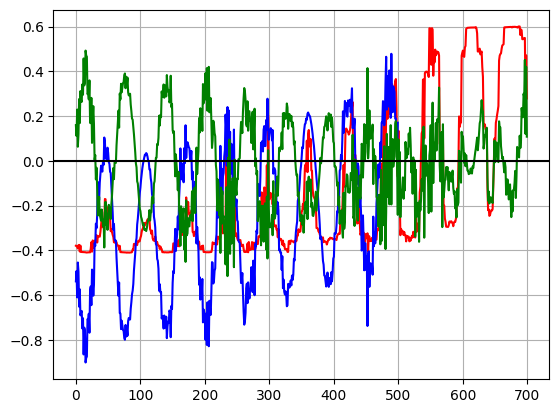

In [128]:
# import torch
# import torch.nn as nn
# import numpy as np
# import time
# import math
# from matplotlib import pyplot

# torch.manual_seed(0)
# np.random.seed(0)

# # S is the source sequence length
# # T is the target sequence length
# # N is the batch size
# # E is the feature number

# #src = torch.rand((10, 32, 512)) # (S,N,E) 
# #tgt = torch.rand((20, 32, 512)) # (T,N,E)
# #out = transformer_model(src, tgt)

# input_window = 100 # number of input steps
# output_window = 1 # number of prediction steps, in this model its fixed to one
# block_len = input_window + output_window # for one input-output pair
# batch_size = 10
# train_size = 0.8
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# class PositionalEncoding(nn.Module):

#     def __init__(self, d_model, max_len=5000):
#         super(PositionalEncoding, self).__init__()       
#         pe = torch.zeros(max_len, d_model)
#         position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
#         # div_term = torch.exp(
#         #     torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model)
#         # )
#         div_term = 1 / (10000 ** ((2 * np.arange(d_model)) / d_model))
#         pe[:, 0::2] = torch.sin(position * div_term[0::2])
#         pe[:, 1::2] = torch.cos(position * div_term[1::2])

#         pe = pe.unsqueeze(0).transpose(0, 1) # [5000, 1, d_model],so need seq-len <= 5000
#         #pe.requires_grad = False
#         self.register_buffer('pe', pe)

#     def forward(self, x):
#         # print(self.pe[:x.size(0), :].repeat(1,x.shape[1],1).shape ,'---',x.shape)
#         # dimension 1 maybe inequal batchsize
#         return x + self.pe[:x.size(0), :].repeat(1,x.shape[1],1)
          

# class TransAm(nn.Module):
#     def __init__(self,feature_size=250,num_layers=1,dropout=0.1):
#         super(TransAm, self).__init__()
#         self.model_type = 'Transformer'
#         self.input_embedding  = nn.Linear(1,feature_size)
#         self.src_mask = None

#         self.pos_encoder = PositionalEncoding(feature_size)
#         self.encoder_layer = nn.TransformerEncoderLayer(d_model=feature_size, nhead=10, dropout=dropout)
#         self.transformer_encoder = nn.TransformerEncoder(self.encoder_layer, num_layers=num_layers)
#         self.decoder = nn.Linear(feature_size,1)
#         self.init_weights()

#     def init_weights(self):
#         initrange = 0.1    
#         self.decoder.bias.data.zero_()
#         self.decoder.weight.data.uniform_(-initrange, initrange)

#     def forward(self,src):
#         # src with shape (input_window, batch_len, 1)
#         if self.src_mask is None or self.src_mask.size(0) != len(src):
#             device = src.device
#             mask = self._generate_square_subsequent_mask(len(src)).to(device)
#             self.src_mask = mask

#         src = self.input_embedding(src) # linear transformation before positional embedding
#         src = self.pos_encoder(src)
#         output = self.transformer_encoder(src,self.src_mask)#, self.src_mask)
#         output = self.decoder(output)
#         return output

#     def _generate_square_subsequent_mask(self, sz):
#         mask = (torch.triu(torch.ones(sz, sz)) == 1).transpose(0, 1)
#         mask = mask.float().masked_fill(mask == 0, float('-inf')).masked_fill(mask == 1, float(0.0))
#         return mask

# # if window is 100 and prediction step is 1
# # in -> [0..99]
# # target -> [1..100]
# '''
# In fact, assuming that the number of samples is N, 
# the length of the input sequence is m, and the backward prediction is k steps, 
# then length of a block [input : 1 , 2 ... m  -> output : k , k+1....m+k ] 
# should be (m+k) :  block_len, so to ensure that each block is complete, 
# the end element of the last block should be the end element of the entire sequence, 
# so the actual number of blocks is [N - block_len + 1] 
# '''
# def create_inout_sequences(input_data, input_window ,output_window):
#     inout_seq = []
#     L = len(input_data)
#     block_num =  L - block_len + 1
#     # total of [N - block_len + 1] blocks
#     # where block_len = input_window + output_window

#     for i in range( block_num ):
#         train_seq = input_data[i : i + input_window]
#         train_label = input_data[i + output_window : i + input_window + output_window]
#         inout_seq.append((train_seq ,train_label))

#     return torch.FloatTensor(np.array(inout_seq))

# def get_data():
#     # construct a littel toy dataset
#     time        = np.arange(0, 400, 0.1)    
#     amplitude   = np.sin(time) + np.sin(time * 0.05) + \
#                   np.sin(time * 0.12) * np.random.normal(-0.2, 0.2, len(time))

#     from sklearn.preprocessing import MinMaxScaler
    
#     #loading weather data from a file
#     #from pandas import read_csv
#     #series = read_csv('daily-min-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
    
#     # looks like normalizing input values curtial for the model
#     scaler = MinMaxScaler(feature_range=(-1, 1)) 
#     #amplitude = scaler.fit_transform(series.to_numpy().reshape(-1, 1)).reshape(-1)
#     amplitude = scaler.fit_transform(amplitude.reshape(-1, 1)).reshape(-1)

#     sampels = int(len(time) * train_size) # use a parameter to control training size
#     train_data = amplitude[:sampels]
#     test_data = amplitude[sampels:]

#     # convert our train data into a pytorch train tensor
#     #train_tensor = torch.FloatTensor(train_data).view(-1)

#     train_sequence = create_inout_sequences( train_data,input_window ,output_window)
#     '''
#     train_sequence = train_sequence[:-output_window] # todo: fix hack? -> din't think this through, looks like the last n sequences are to short, so I just remove them. Hackety Hack..
#     # looks like maybe solved
#     '''
#     #test_data = torch.FloatTensor(test_data).view(-1) 
#     test_data = create_inout_sequences(test_data,input_window,output_window)
#     '''
#     test_data = test_data[:-output_window] # todo: fix hack?
#     '''
#     # shape with (block , sql_len , 2 )
#     return train_sequence.to(device),test_data.to(device)


# def get_batch(input_data, i , batch_size):

#     # batch_len = min(batch_size, len(input_data) - 1 - i) #  # Now len-1 is not necessary
#     batch_len = min(batch_size, len(input_data) - i)
#     data = input_data[ i:i + batch_len ]
#     input = torch.stack([item[0] for item in data]).view((input_window,batch_len,1))
#     # ( seq_len, batch, 1 ) , 1 is feature size
#     target = torch.stack([item[1] for item in data]).view((input_window,batch_len,1))
#     return input, target

# def train(train_data):
#     model.train() # Turn on the train mode \o/
#     total_loss = 0.
#     start_time = time.time()

#     for batch, i in enumerate(range(0, len(train_data), batch_size)):  # Now len-1 is not necessary
#         # data and target are the same shape with (input_window,batch_len,1)
#         data, targets = get_batch(train_data, i , batch_size)
#         optimizer.zero_grad()
#         output = model(data)
#         loss = criterion(output, targets)
#         loss.backward()
#         torch.nn.utils.clip_grad_norm_(model.parameters(), 0.7)
#         optimizer.step()

#         total_loss += loss.item()
#         log_interval = int(len(train_data) / batch_size / 5)
#         if batch % log_interval == 0 and batch > 0:
#             cur_loss = total_loss / log_interval
#             elapsed = time.time() - start_time
#             print('| epoch {:3d} | {:5d}/{:5d} batches | '
#                   'lr {:02.6f} | {:5.2f} ms | '
#                   'loss {:5.5f} | ppl {:8.2f}'.format(
#                     epoch, batch, len(train_data) // batch_size, scheduler.get_lr()[0],
#                     elapsed * 1000 / log_interval,
#                     cur_loss, math.exp(cur_loss)))
#             total_loss = 0
#             start_time = time.time()

# def plot_and_loss(eval_model, data_source,epoch):
#     eval_model.eval() 
#     total_loss = 0.
#     test_result = torch.Tensor(0)    
#     truth = torch.Tensor(0)
#     with torch.no_grad():
#         # for i in range(0, len(data_source) - 1):
#         for i in range(len(data_source)):  # Now len-1 is not necessary
#             data, target = get_batch(data_source, i , 1) # one-step forecast
#             output = eval_model(data)            
#             total_loss += criterion(output, target).item()
#             test_result = torch.cat((test_result, output[-1].view(-1).cpu()), 0)
#             truth = torch.cat((truth, target[-1].view(-1).cpu()), 0)
            
#     #test_result = test_result.cpu().numpy() -> no need to detach stuff.. 
#     len(test_result)

#     pyplot.plot(test_result,color="red")
#     pyplot.plot(truth[:500],color="blue")
#     pyplot.plot(test_result-truth,color="green")
#     pyplot.grid(True, which='both')
#     pyplot.axhline(y=0, color='k')
#     pyplot.savefig('graph/transformer-epoch%d.png'%epoch)
#     pyplot.close()
#     return total_loss / i


# # predict the next n steps based on the input data 
# def predict_future(eval_model, data_source,steps):
#     eval_model.eval() 
#     total_loss = 0.
#     test_result = torch.Tensor(0)    
#     truth = torch.Tensor(0)
#     data, _ = get_batch(data_source , 0 , 1)
#     with torch.no_grad():
#         for i in range(0, steps):            
#             output = eval_model(data[-input_window:])
#             # (seq-len , batch-size , features-num)
#             # input : [ m,m+1,...,m+n ] -> [m+1,...,m+n+1]
#             data = torch.cat((data, output[-1:])) # [m,m+1,..., m+n+1]

#     data = data.cpu().view(-1)
    
#     # I used this plot to visualize if the model pics up any long therm structure within the data.
#     pyplot.plot(data,color="red")       
#     pyplot.plot(data[:input_window],color="blue")    
#     pyplot.grid(True, which='both')
#     pyplot.axhline(y=0, color='k')
#     pyplot.savefig('graph/transformer-future%d.png'%steps)
#     pyplot.show()
#     pyplot.close()
        

# def evaluate(eval_model, data_source):
#     eval_model.eval() # Turn on the evaluation mode
#     total_loss = 0.
#     eval_batch_size = 1000
#     with torch.no_grad():
#         # for i in range(0, len(data_source) - 1, eval_batch_size): # Now len-1 is not necessary
#         for i in range(0, len(data_source), eval_batch_size):
#             data, targets = get_batch(data_source, i,eval_batch_size)
#             output = eval_model(data)            
#             total_loss += len(data[0]) * criterion(output, targets).cpu().item()
#     return total_loss / len(data_source)

# train_data, val_data = get_data()
# model = TransAm().to(device)

# criterion = nn.MSELoss()
# lr = 0.005 
# #optimizer = torch.optim.SGD(model.parameters(), lr=lr)
# optimizer = torch.optim.AdamW(model.parameters(), lr=lr)
# scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1, gamma=0.95)

# best_val_loss = float("inf")
# epochs = 10 # The number of epochs
# best_model = None

# for epoch in range(1, epochs + 1):
#     epoch_start_time = time.time()
#     train(train_data)
#     if ( epoch % 5 == 0 ):
#         val_loss = plot_and_loss(model, val_data,epoch)
#         predict_future(model, val_data,200)
#     else:
#         val_loss = evaluate(model, val_data)
   
#     print('-' * 89)
#     print('| end of epoch {:3d} | time: {:5.2f}s | valid loss {:5.5f} | valid ppl {:8.2f}'.format(epoch, (time.time() - epoch_start_time),
#                                      val_loss, math.exp(val_loss)))
#     print('-' * 89)

#     #if val_loss < best_val_loss:
#     #    best_val_loss = val_loss
#     #    best_model = model

#     scheduler.step() 

# #src = torch.rand(input_window, batch_size, 1) # (source sequence length,batch size,feature number) 
# #out = model(src)
# #
# #print(out)
# #print(out.shape)

## Transformer - 2

In [ ]:
import pandas as pd

In [ ]:
names = ['year','month','day','dec_year','sn_value','sn_error','obs_num','unused1']
df = pd.read_csv("https://data.heatonresearch.com/data/t81-558/SN_d_tot_V2.0.csv", sep = ';', header = None, names = names)
df

,year,month,day,dec_year,sn_value,sn_error,obs_num,unused1
0,1818,1,1,1818.001,-1,-1.0,0,1
1,1818,1,2,1818.004,-1,-1.0,0,1
2,1818,1,3,1818.007,-1,-1.0,0,1
3,1818,1,4,1818.010,-1,-1.0,0,1
4,1818,1,5,1818.012,-1,-1.0,0,1
...,...,...,...,...,...,...,...,...
72860,2017,6,26,2017.484,21,1.1,25,0
72861,2017,6,27,2017.486,19,1.2,36,0
72862,2017,6,28,2017.489,17,1.1,22,0
72863,2017,6,29,2017.492,12,0.5,25,0
